In [167]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [169]:
AO_length = 0.125
CO_length = 0.378 # når EO=RO=C0 the ball is transitioning from the launcher to free fall
DO_lenght = 0.440

k = 3.21 * 1000
# AE is a spring
AE_L0 = 0.280 # resting lengt of the spring

DE = np.arange(0,11)*0.0235 + 0.039 # 11 settings from 0.039 to 0.274 speed setting
theta_deg_initial = [5.8, 9.7, 13.7, 17.7, 21.8, 26, 30.2] # height adjustment
theta_rad_initial = np.deg2rad(theta_deg_initial)

height_setting = 3 #Default for all but one of the baseball settings.
theta_deg_end = 90
theta_rad_end = np.deg2rad(theta_deg_end)

print(DE)

[0.039  0.0625 0.086  0.1095 0.133  0.1565 0.18   0.2035 0.227  0.2505
 0.274 ]


In [171]:
theta_deg = np.arange(0,360,0.1)
theta_rad = theta_deg*2*pi/360

In [173]:
AO = np.column_stack((-0.125 * np.cos(theta_rad), -0.125 * np.sin(theta_rad), np.zeros(3600)))
EO = np.array([0.274, -0.440, 0])
EA = EO - AO

EA_length = np.linalg.norm(EA, axis=1)
EA_angle_rad = np.arctan2(EA[:, 1], EA[:, 0])
EA_angle_deg = np.rad2deg(EA_angle_rad)
CAangE_rad = theta_rad - EA_angle_rad
CAangE_deg = np.rad2deg(CAangE_rad)

x_length = EA_length - AE_L0
fjærkraft = k*x_length
fjærkraft_vinkelrett_AC = fjærkraft*np.sin(CAangE_rad)
fjærkraft_radielt_AC = fjærkraft*np.cos(CAangE_rad)


M_om_O_fra_fjærkraft = fjærkraft_vinkelrett_AC*AO_length
print(EA_length[0])
print(theta_deg[1])

0.5939705379898905
0.1


In [175]:
np.mean(fjærkraft_vinkelrett_AC[177:900])
len(DE)

11

In [177]:
mean_fjær  = np.zeros(len(DE))
max_fjær = np.zeros(len(DE))
phi_at_max = np.zeros(len(DE))
mean_moment = np.zeros(len(DE))
x_length = np.zeros((len(DE),3600))
EA_angle_deg = np.zeros((len(DE),3600))
fjærkraft = np.zeros((len(DE), 3600))
fjærkraft_vinkelrett_AC = np.zeros((len(DE), 3600))
fjærkraft_radielt_AC = np.zeros((len(DE), 3600))
M_om_O_fra_fjærkraft = np.zeros((len(DE), 3600))

plot_range = np.arange(177,1300)

for i, DE_lenght in enumerate(DE):
    AO = np.column_stack((-0.125 * np.cos(theta_rad), -0.125 * np.sin(theta_rad), np.zeros(3600)))
    EO = np.array([DE_lenght, -0.440, 0])
    EA = EO - AO
    
    EA_length = np.linalg.norm(EA, axis=1)
    EA_angle_rad = np.arctan2(EA[:, 1], EA[:, 0])
    EA_angle_deg[i,:] = np.rad2deg(EA_angle_rad)
    CAangE_rad = theta_rad - EA_angle_rad
    CAangE_deg = np.rad2deg(CAangE_rad)
    
    x_length[i,:] = EA_length - AE_L0
    fjærkraft[i,:] = k*x_length[i,:]
    fjærkraft_vinkelrett_AC[i] = fjærkraft[i]*np.sin(CAangE_rad)
    fjærkraft_radielt_AC[i] = fjærkraft[i]*np.cos(CAangE_rad)
    
    
    M_om_O_fra_fjærkraft[i] = fjærkraft_vinkelrett_AC[i]*AO_length

    mean_fjær[i]=(np.mean(fjærkraft_vinkelrett_AC[i,177:900]))
    mean_moment[i] = np.mean(M_om_O_fra_fjærkraft[i,177:900])
    max_fjær[i] = fjærkraft[i,58]
    phi_at_max[i] = EA_angle_deg[i,58]


In [179]:
mean_fjær[1]

247.21217547627765

In [181]:
def create_latex_table_5col(DE, max_fjær, phi, mean_fjær, mean_moment, 
                            table_caption="Fjærkraft-statistikk", 
                            label="tab:fjaerkraft"):
    """
    Generate a LaTeX table with five columns:
      1) DE [m]
      2) Maks Fjærkraft Totalt (Theta=6°) [N]
      3) Vinkel phi [deg]
      4) Gjennomsnittlig Fjærkraft Vinkelrett [N]
      5) Gjennomsnittlig Moment [Nm]

    Each column is centered with fixed widths, using p{} columns.

    Parameters
    ----------
    DE : list or array
        DE values.
    max_fjær : list or array
        Maks fjærkraft values for each DE.
    phi : list or array
        Angle phi values for each DE (in degrees).
    mean_fjær : list or array
        Gjennomsnittlig fjærkraft vinkelrett for each DE.
    mean_moment : list or array
        Gjennomsnittlig moment for each DE.
    table_caption : str
        The caption text to appear under the table.
    label : str
        The LaTeX label for referencing the table.

    Returns
    -------
    str
        Multi-line string containing the LaTeX code for the table.
    """

    # Basic checks
    n = len(DE)
    assert len(max_fjær) == n, "max_fjær must have same length as DE."
    assert len(phi) == n, "phi must have same length as DE."
    assert len(mean_fjær) == n, "mean_fjær must have same length as DE."
    assert len(mean_moment) == n, "mean_moment must have same length as DE."

    latex_lines = []
    latex_lines.append(r"\begin{table}[h!]")
    latex_lines.append(r"\centering")
    latex_lines.append(r"\begin{tabular}{")
    latex_lines.append(r"  >{\centering\arraybackslash}p{2cm} " 
                       r"  >{\centering\arraybackslash}p{3cm}"
                       r"  >{\centering\arraybackslash}p{2cm} "
                       r"  >{\centering\arraybackslash}p{3.5cm} "
                       r"  >{\centering\arraybackslash}p{2.5cm}"
                       r"}")
    latex_lines.append(r"\hline")

    # Header row
    latex_lines.append(
        r"\textbf{DE [m]} & "
        r"\textbf{Maks Fjærkraft Totalt} \boldmath$\Theta=6^\circ$ \textbf{[N]} & "
        r"\textbf{Vinkel} \boldmath$\phi$ \textbf{[deg]} & "
        r"\textbf{Gjennomsnittlig Fjærkraft Vinkelrett [N]} & "
        r"\textbf{Gjennomsnittlig Moment [Nm]} \\"
    )
    latex_lines.append(r"\hline")

    # Table rows for each element
    for i in range(n):
        row_str = (
            f"{DE[i]:.3f} & "                # DE [m]
            f"{max_fjær[i]:.1f} & "          # Maks Fjærkraft
            f"{phi[i]:.1f} & "               # Vinkel phi
            f"{mean_fjær[i]:.1f} & "         # Gj.snitt Fjærkraft
            f"{mean_moment[i]:.1f}\\\\"      # Gj.snitt Moment
        )
        latex_lines.append(row_str)
    latex_lines.append(r"\hline")

    latex_lines.append(r"\end{tabular}")
    latex_lines.append(f"\\caption{{{table_caption}}}")
    latex_lines.append(f"\\label{{{label}}}")
    latex_lines.append(r"\end{table}")

    return "\n".join(latex_lines)


# Generate LaTeX code
latex_code = create_latex_table_5col(
    DE, 
    max_fjær, 
    phi_at_max, 
    mean_fjær, 
    mean_moment,
    table_caption="Fjærkraft-statistikk",
    label="tab:fjaerkraft"
)

print(latex_code)


\begin{table}[h!]
\centering
\begin{tabular}{
  >{\centering\arraybackslash}p{2cm}   >{\centering\arraybackslash}p{3cm}  >{\centering\arraybackslash}p{2cm}   >{\centering\arraybackslash}p{3.5cm}   >{\centering\arraybackslash}p{2.5cm}}
\hline
\textbf{DE [m]} & \textbf{Maks Fjærkraft Totalt} \boldmath$\Theta=6^\circ$ \textbf{[N]} & \textbf{Vinkel} \boldmath$\phi$ \textbf{[deg]} & \textbf{Gjennomsnittlig Fjærkraft Vinkelrett [N]} & \textbf{Gjennomsnittlig Moment [Nm]} \\
\hline
0.039 & 569.9 & -69.1 & 221.1 & 27.6\\
0.062 & 598.5 & -66.4 & 247.2 & 30.9\\
0.086 & 630.2 & -63.8 & 276.9 & 34.6\\
0.110 & 665.0 & -61.3 & 309.9 & 38.7\\
0.133 & 702.6 & -58.9 & 346.3 & 43.3\\
0.157 & 742.8 & -56.7 & 385.6 & 48.2\\
0.180 & 785.4 & -54.5 & 427.8 & 53.5\\
0.204 & 830.2 & -52.5 & 472.5 & 59.1\\
0.227 & 877.2 & -50.6 & 519.3 & 64.9\\
0.251 & 926.0 & -48.7 & 568.1 & 71.0\\
0.274 & 976.6 & -47.0 & 618.6 & 77.3\\
\hline
\end{tabular}
\caption{Fjærkraft-statistikk}
\label{tab:fjaerkraft}
\end{table}


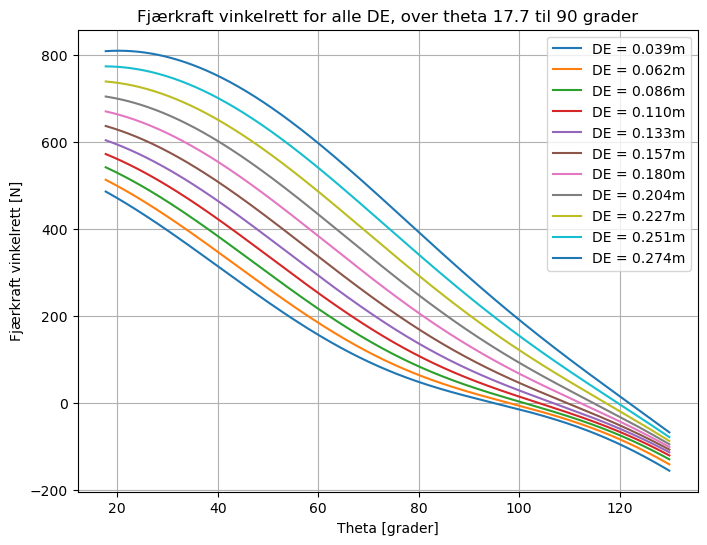

In [153]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(8, 6))

# Loop over each DE index
for i in range(len(DE)):
    plt.plot(theta_deg[plot_range], 
             fjærkraft_vinkelrett_AC [i, plot_range], 
             label=f"DE = {DE[i]:.3f}m")

plt.xlabel("Theta [grader]")
plt.ylabel("Fjærkraft vinkelrett [N]")
plt.title("Fjærkraft vinkelrett for alle DE, over theta 17.7 til 90 grader")
plt.legend()
plt.grid(True)

# Save to file
plt.savefig("plots/fjærkraft_vinkelrett_AC.png", dpi=300)

# Show the plot
plt.show()


In [ ]:
print(x_length[10,177])
print(x_length[10,1250])

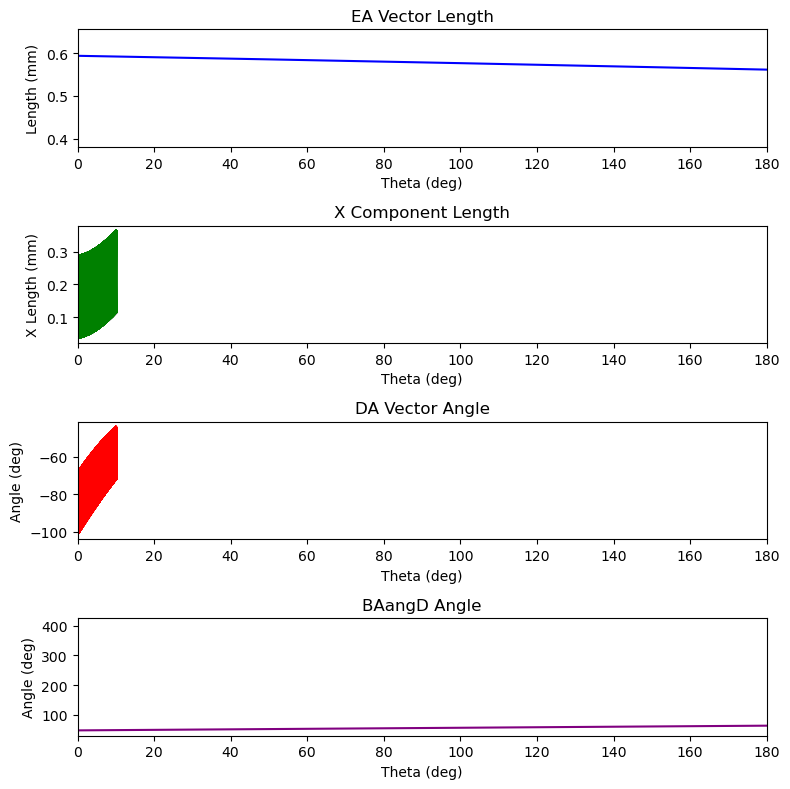

In [116]:
maxTheta = 180
fig, ax = plt.subplots(4, figsize=(8, 8))

# First subplot: DA Length
ax[0].plot(EA_length, color='blue')
ax[0].set_xlim(0, maxTheta)
ax[0].set_title('EA Vector Length')
ax[0].set_xlabel('Theta (deg)')
ax[0].set_ylabel('Length (mm)')

# Second subplot: x_length (assuming x_length is defined)
ax[1].plot(x_length, color='green')
ax[1].set_xlim(0, maxTheta)
ax[1].set_title('X Component Length')
ax[1].set_xlabel('Theta (deg)')
ax[1].set_ylabel('X Length (mm)')

# Third subplot: DA Angle in degrees
ax[2].plot(EA_angle_deg, color='red')
ax[2].set_xlim(0, maxTheta)
ax[2].set_title('DA Vector Angle')
ax[2].set_xlabel('Theta (deg)')
ax[2].set_ylabel('Angle (deg)')

# Fourth subplot: BAangD_deg (assuming BAangD_deg is defined)
ax[3].plot(CAangE_deg, color='purple')
ax[3].set_xlim(0, maxTheta)
ax[3].set_title('BAangD Angle')
ax[3].set_xlabel('Theta (deg)')
ax[3].set_ylabel('Angle (deg)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


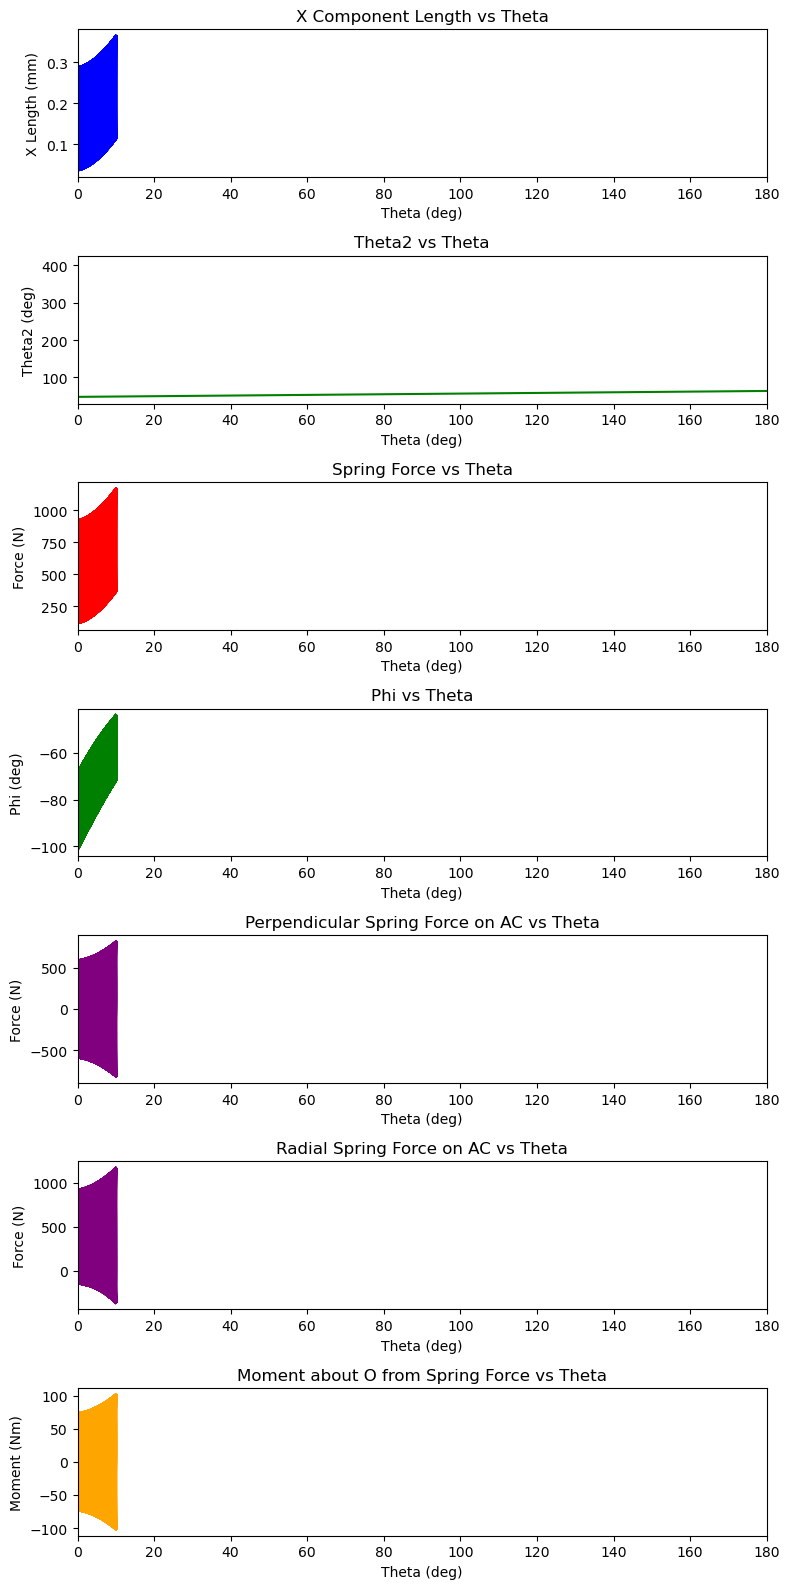

In [117]:
maxTheta = 180
fig, ax = plt.subplots(7, figsize=(8, 16))

# First subplot: X Component Length
ax[0].plot(x_length, color='blue')
ax[0].set_xlim(0, maxTheta)
ax[0].set_title('X Component Length vs Theta')
ax[0].set_xlabel('Theta (deg)')
ax[0].set_ylabel('X Length (mm)')

# Second subplot: BA Angle in degrees
ax[1].plot(CAangE_deg, color='green')
ax[1].set_xlim(0, maxTheta)
ax[1].set_title('Theta2 vs Theta')
ax[1].set_xlabel('Theta (deg)')
ax[1].set_ylabel('Theta2 (deg)')

# Third subplot: Spring Force (fjærkraft)
ax[2].plot(fjærkraft, color='red')
ax[2].set_xlim(0, maxTheta)
ax[2].set_title('Spring Force vs Theta')
ax[2].set_xlabel('Theta (deg)')
ax[2].set_ylabel('Force (N)')

# Second subplot: BA Angle in degrees
ax[3].plot(EA_angle_deg, color='green')
ax[3].set_xlim(0, maxTheta)
ax[3].set_title('Phi vs Theta')
ax[3].set_xlabel('Theta (deg)')
ax[3].set_ylabel('Phi (deg)')

# Fourth subplot: Perpendicular Spring Force on AB (fjærkraft_vinkelrett_AB)
ax[4].plot(fjærkraft_vinkelrett_AC, color='purple')
ax[4].set_xlim(0, maxTheta)
ax[4].set_title('Perpendicular Spring Force on AC vs Theta')
ax[4].set_xlabel('Theta (deg)')
ax[4].set_ylabel('Force (N)')

# Fourth subplot: Perpendicular Spring Force on AB (fjærkraft_vinkelrett_AB)
ax[5].plot(fjærkraft_radielt_AC, color='purple')
ax[5].set_xlim(0, maxTheta)
ax[5].set_title('Radial Spring Force on AC vs Theta')
ax[5].set_xlabel('Theta (deg)')
ax[5].set_ylabel('Force (N)')

# Fifth subplot: Moment about O from Spring Force (M_om_O_fra_fjærkraft/1000)
ax[6].plot(M_om_O_fra_fjærkraft, color='orange')
ax[6].set_xlim(0, maxTheta)
ax[6].set_title('Moment about O from Spring Force vs Theta')
ax[6].set_xlabel('Theta (deg)')
ax[6].set_ylabel('Moment (Nm)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [118]:
fjærkraft = np.zeros((len(DE), 3600))
print(np.zeros((len(DE), 3600)).shape)

print(fjærkraft.shape)

(11, 3600)
(11, 3600)
